In [49]:
from network_environment import NetworkEnvironment
from amalearn.reward import GaussianReward
from Bernoulli_reward import BernoulliReward
from one_action_agent import OneActionAgent
from gradient_bandit_agent import GradientBanditAgent
from epsilon_greedy_agent import EpsilonGreedyAgent

import numpy as np 
np.random.seed(2)

import matplotlib.pyplot as plt

In [50]:
actions = [ '0-1-5-8-12','0-1-5-9-12','0-1-5-10-12','0-1-5-11-12','0-1-6-8-12','0-1-6-9-12','0-1-6-10-12','0-1-6-11-12',    
            '0-1-7-8-12','0-1-7-9-12','0-1-7-10-12','0-1-7-11-12','0-2-5-8-12','0-2-5-9-12','0-2-5-10-12','0-2-5-11-12',
            '0-2-6-8-12','0-2-6-9-12','0-2-6-10-12','0-2-6-11-12','0-2-7-8-12','0-2-7-9-12','0-2-7-10-12','0-2-7-11-12',
            '0-3-5-8-12','0-3-5-9-12','0-3-5-10-12','0-3-5-11-12','0-3-6-8-12','0-3-6-9-12','0-3-6-10-12','0-3-6-11-12',
            '0-3-7-8-12','0-3-7-9-12','0-3-7-10-12','0-3-7-11-12','0-4-5-8-12','0-4-5-9-12','0-4-5-10-12','0-4-5-11-12',
            '0-4-6-8-12','0-4-6-9-12','0-4-6-10-12','0-4-6-11-12','0-4-7-8-12','0-4-7-9-12','0-4-7-10-12','0-4-7-11-12']

In [51]:
rewards = [
    (GaussianReward(8,3),BernoulliReward(0.1,10),GaussianReward(8,3),BernoulliReward(0.1,10),GaussianReward(2,9.5),BernoulliReward(0.12,10),GaussianReward(9,8.2)),
    (GaussianReward(8,3),BernoulliReward(0.1,10),GaussianReward(8,3),BernoulliReward(0.1,10),GaussianReward(2,9.5),BernoulliReward(0.2,10),GaussianReward(2,9.5)),
    (GaussianReward(8,3),BernoulliReward(0.1,10),GaussianReward(8,3),BernoulliReward(0.1,10),GaussianReward(2,9.5),BernoulliReward(0.05,10),GaussianReward(2,9.5)),
    (GaussianReward(8,3),BernoulliReward(0.1,10),GaussianReward(8,3),BernoulliReward(0.1,10), GaussianReward(2,9.5),BernoulliReward(0.45,10),GaussianReward(2,9.5)),

    (GaussianReward(8,3),BernoulliReward(0.1,10),GaussianReward(9,8.2),BernoulliReward(0.15,10),GaussianReward(2,9.5),BernoulliReward(0.12,10),GaussianReward(9,8.2)),
    (GaussianReward(8,3),BernoulliReward(0.1,10),GaussianReward(9,8.2),BernoulliReward(0.15,10),GaussianReward(2,9.5),BernoulliReward(0.2,10),GaussianReward(2,9.5)),
    (GaussianReward(8,3),BernoulliReward(0.1,10),GaussianReward(9,8.2),BernoulliReward(0.15,10),GaussianReward(2,9.5),BernoulliReward(0.05,10),GaussianReward(2,9.5)),
    (GaussianReward(8,3),BernoulliReward(0.1,10),GaussianReward(9,8.2),BernoulliReward(0.15,10),GaussianReward(2,9.5),BernoulliReward(0.45,10),GaussianReward(2,9.5)),

    (GaussianReward(8,3),BernoulliReward(0.1,10),GaussianReward(9,8.2),BernoulliReward(0.65,10),GaussianReward(2,9.5),BernoulliReward(0.12,10),GaussianReward(9,8.2)),
    (GaussianReward(8,3),BernoulliReward(0.1,10),GaussianReward(9,8.2),BernoulliReward(0.65,10),GaussianReward(2,9.5),BernoulliReward(0.2,10),GaussianReward(2,9.5)),
    (GaussianReward(8,3),BernoulliReward(0.1,10),GaussianReward(9,8.2),BernoulliReward(0.65,10),GaussianReward(2,9.5),BernoulliReward(0.05,10),GaussianReward(2,9.5)),
    (GaussianReward(8,3),BernoulliReward(0.1,10),GaussianReward(9,8.2),BernoulliReward(0.65,10),GaussianReward(2,9.5),BernoulliReward(0.45,10),GaussianReward(2,9.5)),

    (GaussianReward(9,8.2),BernoulliReward(0.06,10),GaussianReward(8,3),BernoulliReward(0.1,10),GaussianReward(2,9.5),BernoulliReward(0.12,10),GaussianReward(9,8.2)),
    (GaussianReward(9,8.2),BernoulliReward(0.06,10),GaussianReward(8,3),BernoulliReward(0.1,10),GaussianReward(2,9.5),BernoulliReward(0.2,10),GaussianReward(2,9.5)),
    (GaussianReward(9,8.2),BernoulliReward(0.06,10),GaussianReward(8,3),BernoulliReward(0.1,10),GaussianReward(2,9.5),BernoulliReward(0.05,10),GaussianReward(2,9.5)),
    (GaussianReward(9,8.2),BernoulliReward(0.06,10),GaussianReward(8,3),BernoulliReward(0.1,10),GaussianReward(2,9.5),BernoulliReward(0.45,10),GaussianReward(2,9.5)),

    (GaussianReward(9,8.2),BernoulliReward(0.06,10),GaussianReward(9,8.2),BernoulliReward(0.15,10),GaussianReward(2,9.5),BernoulliReward(0.12,10),GaussianReward(9,8.2)),
    (GaussianReward(9,8.2),BernoulliReward(0.06,10),GaussianReward(9,8.2),BernoulliReward(0.15,10),GaussianReward(2,9.5),BernoulliReward(0.2,10),GaussianReward(2,9.5)),
   (GaussianReward(9,8.2),BernoulliReward(0.06,10),GaussianReward(9,8.2),BernoulliReward(0.15,10),GaussianReward(2,9.5),BernoulliReward(0.05,10),GaussianReward(2,9.5)),
   (GaussianReward(9,8.2),BernoulliReward(0.06,10),GaussianReward(9,8.2),BernoulliReward(0.15,10),GaussianReward(2,9.5),BernoulliReward(0.45,10),GaussianReward(2,9.5)),

    (GaussianReward(9,8.2),BernoulliReward(0.06,10),GaussianReward(9,8.2),BernoulliReward(0.65,10),GaussianReward(2,9.5),BernoulliReward(0.12,10),GaussianReward(9,8.2)),
    (GaussianReward(9,8.2),BernoulliReward(0.06,10),GaussianReward(9,8.2),BernoulliReward(0.65,10),GaussianReward(2,9.5),BernoulliReward(0.2,10),GaussianReward(2,9.5)),
   (GaussianReward(9,8.2),BernoulliReward(0.06,10),GaussianReward(9,8.2),BernoulliReward(0.65,10),GaussianReward(2,9.5),BernoulliReward(0.05,10),GaussianReward(2,9.5)),
   (GaussianReward(9,8.2),BernoulliReward(0.06,10),GaussianReward(9,8.2),BernoulliReward(0.65,10),GaussianReward(2,9.5),BernoulliReward(0.45,10),GaussianReward(2,9.5)),

    (GaussianReward(8,3),BernoulliReward(0.15,10),GaussianReward(8,3),BernoulliReward(0.1,10),GaussianReward(2,9.5),BernoulliReward(0.12,10),GaussianReward(9,8.2)),
    (GaussianReward(8,3),BernoulliReward(0.15,10),GaussianReward(8,3),BernoulliReward(0.1,10),GaussianReward(2,9.5),BernoulliReward(0.2,10),GaussianReward(2,9.5)),
   (GaussianReward(8,3),BernoulliReward(0.15,10),GaussianReward(8,3),BernoulliReward(0.1,10),GaussianReward(2,9.5),BernoulliReward(0.05,10),GaussianReward(2,9.5)),
   (GaussianReward(8,3),BernoulliReward(0.15,10),GaussianReward(8,3),BernoulliReward(0.1,10),GaussianReward(2,9.5),BernoulliReward(0.45,10),GaussianReward(2,9.5)),

    (GaussianReward(8,3),BernoulliReward(0.15,10),GaussianReward(9,8.2),BernoulliReward(0.15,10),GaussianReward(2,9.5),BernoulliReward(0.12,10),GaussianReward(9,8.2)),
    (GaussianReward(8,3),BernoulliReward(0.15,10),GaussianReward(9,8.2),BernoulliReward(0.15,10),GaussianReward(2,9.5),BernoulliReward(0.2,10),GaussianReward(2,9.5)),
   (GaussianReward(8,3),BernoulliReward(0.15,10),GaussianReward(9,8.2),BernoulliReward(0.15,10),GaussianReward(2,9.5),BernoulliReward(0.05,10),GaussianReward(2,9.5)),
   (GaussianReward(8,3),BernoulliReward(0.15,10),GaussianReward(9,8.2),BernoulliReward(0.15,10),GaussianReward(2,9.5),BernoulliReward(0.45,10),GaussianReward(2,9.5)),

    (GaussianReward(8,3),BernoulliReward(0.15,10),GaussianReward(9,8.2),BernoulliReward(0.65,10),GaussianReward(2,9.5),BernoulliReward(0.12,10),GaussianReward(9,8.2)),
    (GaussianReward(8,3),BernoulliReward(0.15,10),GaussianReward(9,8.2),BernoulliReward(0.65,10),GaussianReward(2,9.5),BernoulliReward(0.2,10),GaussianReward(2,9.5)),
   (GaussianReward(8,3),BernoulliReward(0.15,10),GaussianReward(9,8.2),BernoulliReward(0.65,10),GaussianReward(2,9.5),BernoulliReward(0.05,10),GaussianReward(2,9.5)),
   (GaussianReward(8,3),BernoulliReward(0.15,10),GaussianReward(9,8.2),BernoulliReward(0.65,10),GaussianReward(2,9.5),BernoulliReward(0.45,10),GaussianReward(2,9.5)),

    (GaussianReward(2,9.5),BernoulliReward(0.5,10),GaussianReward(8,3),BernoulliReward(0.1,10),GaussianReward(2,9.5),BernoulliReward(0.12,10),GaussianReward(9,8.2)),
    (GaussianReward(2,9.5),BernoulliReward(0.5,10),GaussianReward(8,3),BernoulliReward(0.1,10),GaussianReward(2,9.5),BernoulliReward(0.2,10),GaussianReward(2,9.5)),
   (GaussianReward(2,9.5),BernoulliReward(0.5,10),GaussianReward(8,3),BernoulliReward(0.1,10),GaussianReward(2,9.5),BernoulliReward(0.05,10),GaussianReward(2,9.5)),
   (GaussianReward(2,9.5),BernoulliReward(0.5,10),GaussianReward(8,3),BernoulliReward(0.1,10),GaussianReward(2,9.5),BernoulliReward(0.45,10),GaussianReward(2,9.5)),

    (GaussianReward(2,9.5),BernoulliReward(0.5,10),GaussianReward(9,8.2),BernoulliReward(0.15,10),GaussianReward(2,9.5),BernoulliReward(0.12,10),GaussianReward(9,8.2)),
    (GaussianReward(2,9.5),BernoulliReward(0.5,10),GaussianReward(9,8.2),BernoulliReward(0.15,10),GaussianReward(2,9.5),BernoulliReward(0.2,10),GaussianReward(2,9.5)),
  (GaussianReward(2,9.5),BernoulliReward(0.5,10),GaussianReward(9,8.2),BernoulliReward(0.15,10),GaussianReward(2,9.5),BernoulliReward(0.05,10),GaussianReward(2,9.5)),
   (GaussianReward(2,9.5),BernoulliReward(0.5,10),GaussianReward(9,8.2),BernoulliReward(0.15,10),GaussianReward(2,9.5),BernoulliReward(0.45,10),GaussianReward(2,9.5)),

    (GaussianReward(2,9.5),BernoulliReward(0.5,10),GaussianReward(9,8.2),BernoulliReward(0.65,10),GaussianReward(2,9.5),BernoulliReward(0.12,10),GaussianReward(9,8.2)),
    (GaussianReward(2,9.5),BernoulliReward(0.5,10),GaussianReward(9,8.2),BernoulliReward(0.65,10),GaussianReward(2,9.5),BernoulliReward(0.2,10),GaussianReward(2,9.5)),
   (GaussianReward(2,9.5),BernoulliReward(0.5,10),GaussianReward(9,8.2),BernoulliReward(0.65,10),GaussianReward(2,9.5),
BernoulliReward(0.05,10),GaussianReward(2,9.5)),
  (GaussianReward(2,9.5),BernoulliReward(0.5,10),GaussianReward(9,8.2),BernoulliReward(0.65,10),GaussianReward(2,9.5),
BernoulliReward(0.45,10),GaussianReward(2,9.5))]

In [53]:
action_values = []

env = NetworkEnvironment(rewards, '1')
for i in range(len(actions)):
    agent = OneActionAgent('1', env,action = i,alpha=1,beta=1,gamma=1)
    for j in range(1000):
        r, q, u = agent.take_action()
    
    action_values.append(q)

15697609 True {}
47578:	action=47
{} -27.521431417550993 True {}
47579:	action=47
{} -23.831406298311194 True {}
47580:	action=47
{} -35.25845941354538 True {}
47581:	action=47
{} 8.192597612974145 True {}
47582:	action=47
{} -44.1527306238668 True {}
47583:	action=47
{} -8.945335687328916 True {}
47584:	action=47
{} -22.507484535854616 True {}
47585:	action=47
{} -33.25750041197318 True {}
47586:	action=47
{} -70.37352633016303 True {}
47587:	action=47
{} -49.398220626660816 True {}
47588:	action=47
{} -43.54947402244701 True {}
47589:	action=47
{} -39.60829159270187 True {}
47590:	action=47
{} -34.21990881045449 True {}
47591:	action=47
{} -90.26106378318573 True {}
47592:	action=47
{} -52.348105070321374 True {}
47593:	action=47
{} -7.071185720697196 True {}
47594:	action=47
{} -32.55952336332305 True {}
47595:	action=47
{} -26.181477811939292 True {}
47596:	action=47
{} -31.454944057731005 True {}
47597:	action=47
{} -8.80596145087765 True {}
47598:	action=47
{} -0.343749997526837 

In [54]:
print(max(action_values))
print(np.argmax(action_values))

-21.04492241077637
38


In [55]:
exp_opt_act = -21.144
opt_act = 38

In [56]:
exp_opt_act = max(action_values)
opt_act = np.argmax(action_values)

In [57]:
np.array(action_values).reshape(12,4)

array([[-30.13679734, -24.3582288 , -23.14609368, -26.48693043],
       [-31.18318747, -25.97399451, -24.37041652, -26.8612345 ],
       [-36.72065549, -29.92342416, -29.04390935, -32.0915369 ],
       [-31.03255256, -23.6383005 , -23.09636546, -26.53385424],
       [-32.46860858, -26.25404239, -24.68711679, -28.10818562],
       [-37.01441326, -31.525277  , -29.48223551, -34.70991265],
       [-30.94360271, -24.97971289, -22.48541598, -26.87085195],
       [-32.07221029, -26.1860226 , -24.96015999, -28.55573393],
       [-36.81578791, -30.85286165, -29.45728047, -34.25071619],
       [-27.40711767, -21.82162806, -21.04492241, -24.52128264],
       [-31.01965647, -24.53974093, -22.41528716, -24.59615613],
       [-34.2281654 , -27.4355563 , -26.84283525, -31.37214402]])

# Epsilon Greedy Algorithm 

## epsilon = 0.1

In [58]:
regret = np.zeros((5001,1))
perc_opt_act = np.zeros((5001,1))
average_rewards = np.zeros((5001,1))
number_actions = np.zeros((48,5001))
convergance_trials = []

for r in range(30):
    sum_rewards = 0
    opt_act_count = 0
    avg = 0 
    convergance_trial = 0
    no_actions = np.zeros((48,5001))
    env = NetworkEnvironment(rewards, '1')
    agent = EpsilonGreedyAgent('1', env, epsilon=0.1,epsilon_decay=1,alpha=0.88,beta=0.88,gamma=2.25)
    for t in range(5001):
        rew , act, uti = agent.take_action()
        
        sum_rewards += rew
        regret[t] += (((t+1)*exp_opt_act - sum_rewards) - regret[t]) / (r+1)
        
        opt_act_count += int(act == opt_act)
        perc_opt_act[t] += ((opt_act_count / (t+1)) - perc_opt_act[t]) / (r+1)
        
        avg += (rew - avg) / (t+1)
        average_rewards[t] += ( avg - average_rewards[t]) / (r+1)

        n = agent.get_number_actions().reshape(48,)
        number_actions[:,t] += (n - number_actions[:,t]) / (r+1)

        no_actions[:,t] = n 
    
    for i in range(100,5001):
        if no_actions[opt_act,i] - no_actions[opt_act,i-100] > 8:
            convergance_trial = i-100
            break
    
    env.reset()
    convergance_trials.append(convergance_trial)

4877779372 True {}
4570:	action=38
{} -62.63615526695942 True {}
4571:	action=38
{} 11.523161710356126 True {}
4572:	action=38
{} -4.796235869738757 True {}
4573:	action=38
{} -25.558494185124353 True {}
4574:	action=38
{} -25.558324797095032 True {}
4575:	action=38
{} -7.320349605548479 True {}
4576:	action=38
{} -22.93065841741001 True {}
4577:	action=29
{} -16.479013795026567 True {}
4578:	action=38
{} -34.22116106063427 True {}
4579:	action=38
{} -18.24279510465988 True {}
4580:	action=38
{} -13.124679959108995 True {}
4581:	action=38
{} -20.751893237179168 True {}
4582:	action=38
{} -26.62554919743475 True {}
4583:	action=38
{} -5.912706922100478 True {}
4584:	action=28
{} -54.91722734094796 True {}
4585:	action=38
{} -43.05199242145018 True {}
4586:	action=38
{} -31.6198309974994 True {}
4587:	action=38
{} -0.38045207842626905 True {}
4588:	action=38
{} -26.776935447666567 True {}
4589:	action=38
{} -41.39011535692204 True {}
4590:	action=38
{} -38.02876739485995 True {}
4591:	ac

In [81]:
np.sum(convergance_trials)/np.count_nonzero(convergance_trials)

696.1111111111111

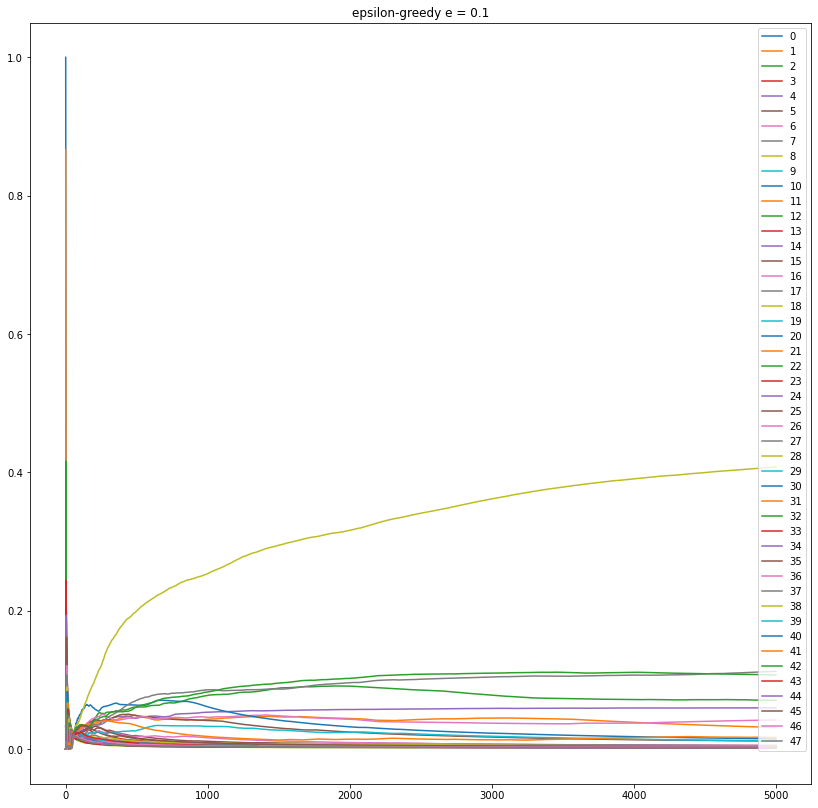

In [60]:
plt.figure(figsize=(14,14))
for i in range(len(number_actions)):
    plt.plot(range(1,5001),number_actions[i,1:]/range(1,5001))
plt.legend(loc= 'best',labels = range(len(number_actions)))
plt.title("epsilon-greedy e = 0.1")
plt.show()

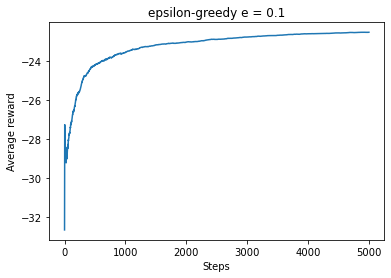

In [61]:
plt.plot(range(5001),average_rewards)
plt.ylabel('Average reward',rotation = 90)
plt.title("epsilon-greedy e = 0.1")
plt.xlabel('Steps')
plt.show()

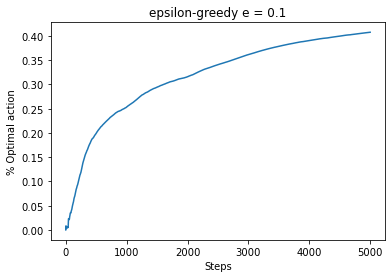

In [62]:
plt.plot(range(5001),perc_opt_act)
plt.ylabel('% Optimal action',rotation = 90)
plt.title("epsilon-greedy e = 0.1")
plt.xlabel('Steps')
plt.show()

## epsilon = 0.01

In [63]:
regret2 = np.zeros((5001,1))
perc_opt_act2 = np.zeros((5001,1))
average_rewards2 = np.zeros((5001,1))
number_actions2 = np.zeros((48,5001))
convergance_trials2 = []

for r in range(30):
    sum_rewards = 0
    opt_act_count = 0
    avg = 0 
    convergance_trial = 0
    no_actions = np.zeros((48,5001))
    env = NetworkEnvironment(rewards, '1')
    agent = EpsilonGreedyAgent('1', env, epsilon=0.01,epsilon_decay=1,alpha=0.88,beta=0.88,gamma=2.25)
    for t in range(5001):
        rew , act, uti = agent.take_action()
        
        sum_rewards += rew
        regret2[t] += (((t+1)*exp_opt_act - sum_rewards) - regret2[t]) / (r+1)
        
        opt_act_count += int(act == opt_act)
        perc_opt_act2[t] += ((opt_act_count / (t+1)) - perc_opt_act2[t]) / (r+1)
        
        avg += (rew - avg) / (t+1)
        average_rewards2[t] += ( avg - average_rewards2[t]) / (r+1)

        n = agent.get_number_actions().reshape(48,)
        number_actions2[:,t] += (n - number_actions2[:,t]) / (r+1)

        no_actions[:,t] = n 
    
    for i in range(100,5001):
        if no_actions[opt_act,i] - no_actions[opt_act,i-100] > 85:
            convergance_trial = i-100
            break
    
    env.reset()
    convergance_trials2.append(convergance_trial)

7327 True {}
4570:	action=42
{} -62.69299173900998 True {}
4571:	action=42
{} -15.272400865650834 True {}
4572:	action=42
{} -10.174511220340621 True {}
4573:	action=42
{} -45.21030144437531 True {}
4574:	action=23
{} -13.17937268232154 True {}
4575:	action=42
{} -51.08038975782499 True {}
4576:	action=42
{} -7.299912555939587 True {}
4577:	action=42
{} -21.878605021761764 True {}
4578:	action=42
{} -18.584727821760566 True {}
4579:	action=42
{} -38.55312957625392 True {}
4580:	action=42
{} -17.58693651491786 True {}
4581:	action=42
{} -4.3714420009691795 True {}
4582:	action=42
{} -35.473094872148465 True {}
4583:	action=42
{} -24.59696174634184 True {}
4584:	action=42
{} -25.440340511662278 True {}
4585:	action=42
{} 3.8370904216572868 True {}
4586:	action=42
{} -34.63631265796984 True {}
4587:	action=42
{} 9.920575851764768 True {}
4588:	action=42
{} -51.17009057642235 True {}
4589:	action=42
{} -18.673304310951178 True {}
4590:	action=42
{} -15.27681556621944 True {}
4591:	action=4

In [83]:
np.sum(convergance_trials2)/np.count_nonzero(convergance_trials2)

nan

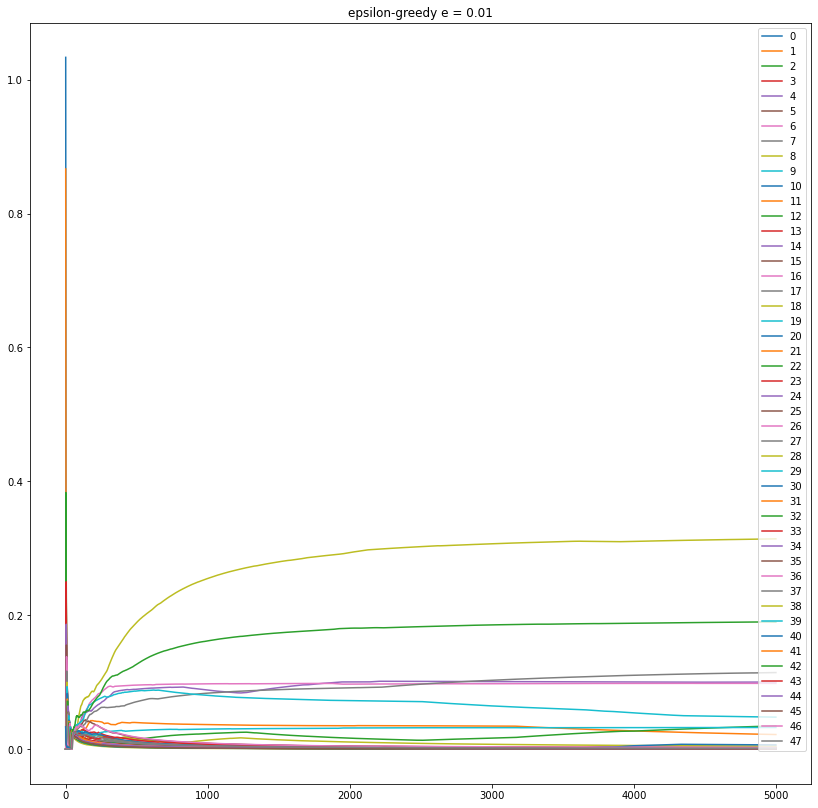

In [65]:
plt.figure(figsize=(14,14))
for i in range(len(number_actions2)):
    plt.plot(range(1,5001),number_actions2[i,1:]/range(1,5001))
plt.legend(loc= 'best',labels = range(len(number_actions2)))
plt.title("epsilon-greedy e = 0.01")
plt.show()

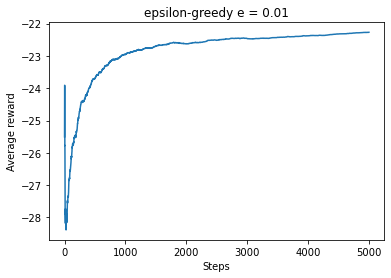

In [66]:
plt.plot(range(5001),average_rewards2)
plt.ylabel('Average reward',rotation = 90)
plt.xlabel('Steps')
plt.title("epsilon-greedy e = 0.01")
plt.show()

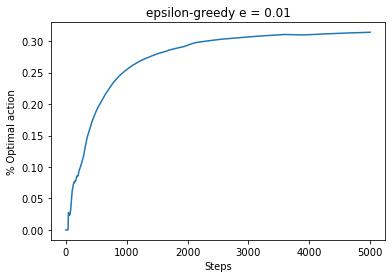

In [67]:
plt.plot(range(5001),perc_opt_act2)
plt.ylabel('% Optimal action',rotation = 90)
plt.xlabel('Steps')
plt.title("epsilon-greedy e = 0.01")
plt.show()

# Gradient Bandit Algorithm 

## learning_rate = 0.02

In [72]:
regret4 = np.zeros((5001,1))
perc_opt_act4 = np.zeros((5001,1))
average_rewards4 = np.zeros((5001,1))
number_actions4 = np.zeros((48,5001))
convergance_trials4 = []

for r in range(30):
    sum_rewards = 0
    opt_act_count = 0
    avg = 0 
    convergance_trial = 0
    no_actions = np.zeros((48,5001))
    env = NetworkEnvironment(rewards, '1')
    agent = GradientBanditAgent('1', env, learning_rate=0.02,learning_rate_decay =1,alpha=0.88,beta=0.88,gamma=2.25)
    for t in range(5001):
        #print(agent.get_all())
        rew , act, uti = agent.take_action()
        
        sum_rewards += rew
        regret4[t] += (((t+1)*exp_opt_act - sum_rewards) - regret4[t]) / (r+1)
        
        opt_act_count += int(act == opt_act)
        perc_opt_act4[t] += ((opt_act_count / (t+1)) - perc_opt_act4[t]) / (r+1)
        
        avg += (rew - avg) / (t+1)
        average_rewards4[t] += ( avg - average_rewards4[t]) / (r+1)


    
    for i in range(100,1001):
        if no_actions[opt_act,i] - no_actions[opt_act,i-100] > 85:
            convergance_trial = i-100
            break

    convergance_trials4.append(convergance_trial)

	action=15
{} -42.364452916463186 True {}
4571:	action=15
{} -23.696561299686216 True {}
4572:	action=15
{} -24.943134964188125 True {}
4573:	action=15
{} -5.299718719746105 True {}
4574:	action=15
{} -24.034685118522102 True {}
4575:	action=15
{} -22.158887654788423 True {}
4576:	action=15
{} -52.022868740811404 True {}
4577:	action=15
{} -39.46011345473195 True {}
4578:	action=15
{} -27.783345447849232 True {}
4579:	action=15
{} -31.464451907099843 True {}
4580:	action=15
{} -12.858574959411555 True {}
4581:	action=15
{} -22.197199219189905 True {}
4582:	action=15
{} -25.09179488159512 True {}
4583:	action=15
{} 3.873298414767044 True {}
4584:	action=15
{} -16.627788067197272 True {}
4585:	action=15
{} -36.607132970993305 True {}
4586:	action=15
{} -23.653081791169477 True {}
4587:	action=15
{} -50.907265710736 True {}
4588:	action=15
{} -11.3885437055433 True {}
4589:	action=15
{} -21.545031921792596 True {}
4590:	action=15
{} -41.85247303118787 True {}
4591:	action=15
{} -46.526560

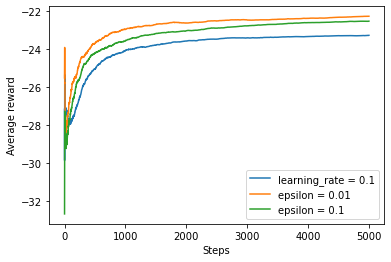

In [78]:
plt.plot(range(5001),average_rewards4)
plt.plot(range(5001),average_rewards2)
plt.plot(range(5001),average_rewards)
plt.ylabel('Average reward',rotation = 90)
plt.xlabel('Steps')
plt.legend(labels= ("learning_rate = 0.02","epsilon = 0.01","epsilon = 0.1"))
plt.show()

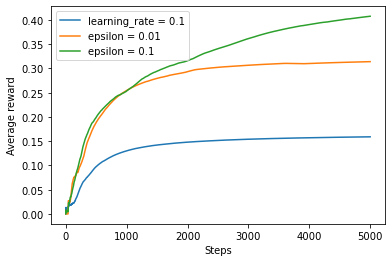

In [80]:
plt.plot(range(5001),perc_opt_act4)
plt.plot(range(5001),perc_opt_act2)
plt.plot(range(5001),perc_opt_act)
plt.ylabel('Average reward',rotation = 90)
plt.xlabel('Steps')
plt.legend(labels= ("learning_rate = 0.02","epsilon = 0.01","epsilon = 0.1"))
plt.show()